# Project 2 "Predicting Players Rating"

## First I have imported all the required Libraries

In [2]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import pylab as pl
import statsmodels.api as sm
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

### Create your connection ~ I downloaded data from given link and added connections to it

In [3]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

##### Just wanted to see what is the overall data, to have better understanding 

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Just wanted to see number of Columns and Rows

In [5]:
df.shape

(183978, 42)

In [6]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [7]:
df['overall_rating'].describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [8]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


## In this step, I am removing all the NAs as we want to make it more accurate - as a part of data cleansing 

In [9]:
df.dropna(inplace=True)

In [10]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

# There are few more columns which doesn’t play any role in deciding the result, so dropping them as well.

In [11]:
df.drop('id', axis = 1, inplace = True)
df.drop('player_fifa_api_id', axis = 1,inplace = True)
df.drop('player_api_id', axis = 1, inplace= True)


In [12]:
df.columns

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [13]:
cols=list(df.columns)

In [14]:
cols = cols[1:]

In [15]:
len(cols)

38

## In below step I have tried to put the data in histogram, but unfortunately it is not working due to heavy file. Several time kernel also got stuck.

KeyError: 'overall_rating'

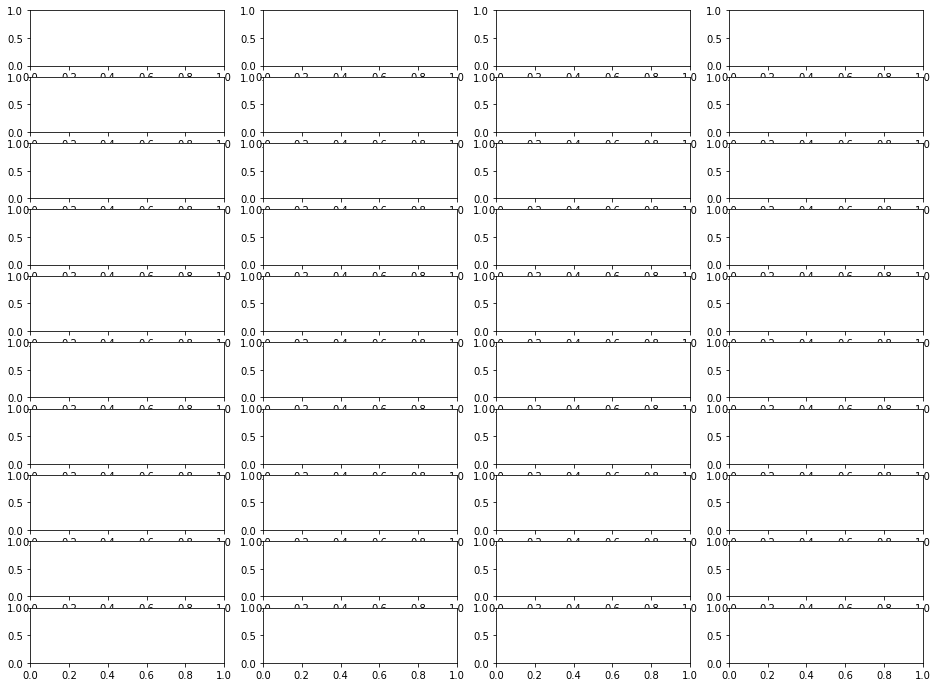

In [27]:
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < 38:
        ax.hist(df[cols[i]])
        ax.set_title(cols[i])
plt.tight_layout()

## Now I am trying to change the format of date and time to get the better result

In [16]:
df.loc[:, "new_date"] = df["date"].apply(pd.to_datetime)
df.loc[:, "month"] = df["new_date"].apply(lambda x: x.month)
df["new_date"].apply(lambda x: x.month)
df.loc[:, "year"] = df["new_date"].apply(lambda x: x.year)
df.loc[:, "day"] = df["new_date"].apply(lambda x: x.day)
df =  df.drop("date", axis = 1)
df = df.drop("new_date", axis = 1)

## Below are some categorical things for which we are creating dummies. This will give us more analytical ground.

In [17]:
cat_cols = ['preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'year',
 'month',
 'day']

In [18]:
for col in cat_cols:
    dummies = pd.get_dummies(df[col], prefix = col)
    df = df.join(dummies)
    df = df.drop(col, axis = 1)

### After creating dummies our columns increased to 116 columns

In [19]:
df.shape

(180354, 116)

## I have also decided overall rating as dependant component and based on other independent component we will run the linier regression model and see the results.

In [20]:
y = df.pop("overall_rating")
X = df

In [21]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

In [22]:
train_x.shape

(144283, 115)

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(train_x, train_y)
train_pred = lm.predict(train_x)
np.sqrt(mean_squared_error(train_y, train_pred))

2.687471190359017

In [25]:
test_pred = lm.predict(test_x)
np.sqrt(mean_squared_error(test_y, test_pred))

2.7088629960734294

In [26]:
scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10)
scores, scores.mean()

(array([-7.44256819, -7.10106665, -7.1964293 , -7.29567788, -7.17236284,
        -7.57297055, -7.1520984 , -7.34232439, -7.48982496, -7.22300491]),
 -7.298832806459034)

# Based on linier regression model we can say that the given rating is proper and we are safe to rely on the given data for the ratings of the players. 
